# Analyzing and Visualizing Social Vulnerability

##### Ricardo Huerta

##### Social vulnerability by County Census Tracts in the Portland Metro Statistical Area (MSA) using Open Source Python

In [2]:
##import necessary open source python modules

import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Data
- 2017 Social Vulnerability for Portland MSA (https://opendata.imspdx.org/dataset/2be8041e-d02e-4d92-b90a-84a0aa878dbf/resource/7543a522-46a8-40ca-97d6-49b7d15c6fa3/download/socvul_msa_2017.csv)
- 2010 Census Tracts (http://rlisdiscovery.oregonmetro.gov/?action=viewDetail&layerID=2588)

In [3]:
## read in the vulnerability csv using url
vuln_csv = r"https://opendata.imspdx.org/dataset/2be8041e-d02e-4d92-b90a-84a0aa878dbf/resource/7543a522-46a8-40ca-97d6-49b7d15c6fa3/download/socvul_msa_2017.csv"
csv_df = pd.read_csv(vuln_csv)

In [4]:
## explore and display the data
csv_df.head()

,GEOID,NAME,Total Population,Dependents,Non-White Population,P_HS,Bachelor's Degrees,Home-Owner Burden,Renter Burden,Disability,...,P_dis_cv,P_nfuel_cv,P_SSI_cv,MHI_cv,unemp_cv,rent_cv,nocar_cv,Vul,Vul_P,Social Vulnerability (%)
0,41005020100,"Census Tract 201, Clackamas County, Oregon",3946,21.8,87.2,97.5,68.3,32.1,46.1,4.8,...,22.8,#NUM!,49.2,9.0,55.7,14.8,44,-0.723346,0.234734,23.473376
1,41005020200,"Census Tract 202, Clackamas County, Oregon",6133,25.7,91.9,98.7,73.3,28.9,45.3,9.5,...,18.6,109.4,82.1,10.9,40.5,8.7,44,-0.479744,0.315705,31.570474
2,41005020302,"Census Tract 203.02, Clackamas County, Oregon",3944,17.3,78.5,98.1,57.5,22.3,24.9,8.7,...,19.6,#NUM!,49.2,10.9,24.9,8.2,30,-0.652934,0.256899,25.689925
3,41005020303,"Census Tract 203.03, Clackamas County, Oregon",5307,25.0,80.7,97.8,67.4,35.3,62.8,10.7,...,17.6,#NUM!,91.2,10.7,93.0,7.0,30,-0.141887,0.443585,44.358469
4,41005020304,"Census Tract 203.04, Clackamas County, Oregon",5621,18.0,77.3,99.0,73.2,22.1,40.3,5.4,...,34.9,#NUM!,98.8,3.9,31.5,7.1,81,-0.724477,0.234387,23.438651


In [5]:
csv_df.tail()

,GEOID,NAME,Total Population,Dependents,Non-White Population,P_HS,Bachelor's Degrees,Home-Owner Burden,Renter Burden,Disability,...,P_dis_cv,P_nfuel_cv,P_SSI_cv,MHI_cv,unemp_cv,rent_cv,nocar_cv,Vul,Vul_P,Social Vulnerability (%)
485,53059950100,"Census Tract 9501, Skamania County, Washington",158,15.8,98.1,97.2,33.0,47.2,0.0,3.8,...,96,#NUM!,60.3,37.3,65.8,46.9,#NUM!,-0.587019,0.278596,27.859561
486,53059950200,"Census Tract 9502, Skamania County, Washington",4643,22.4,92.6,93.3,24.8,24.6,43.8,12.4,...,8.8,91.2,31.4,4.5,20.3,11.4,35,-0.128411,0.448912,44.891203
487,53059950300,"Census Tract 9503, Skamania County, Washington",1864,27.3,91.5,88.5,22.7,25.6,46.6,17.6,...,11.1,#NUM!,22,14.8,26.5,8.8,19,0.335937,0.631541,63.154083
488,53059950400,"Census Tract 9504, Skamania County, Washington",2134,25.8,84.9,88.9,29.5,18.3,35.9,15.7,...,14.7,182.4,39.5,7.9,27.8,13.2,39,-0.140791,0.444018,44.401752
489,53059950500,"Census Tract 9505, Skamania County, Washington",2699,19.3,80.3,87.1,14.2,38.2,55.1,15.8,...,17.3,#NUM!,35.3,2.7,42.2,14.8,38,0.528976,0.701589,70.158909


In [6]:
csv_df.columns

Index(['GEOID', 'NAME', 'Total Population', 'Dependents',
       'Non-White Population', 'P_HS', 'Bachelor's Degrees',
       'Home-Owner Burden', 'Renter Burden', 'Disability', 'P_nfuel', 'P_SSI',
       'MHI', 'Unemployment', 'rent', 'nocar', 'P_dep_rt', 'MHI_rt', 'P_BA_rt',
       'unemp_rt', 'rent_rt', 'P_obdn_rt', 'P_SSI_rt', 'P_WNH_ex', 'nocar_rt',
       'P_HS_ex', 'P_nfuel_rt', 'P_dis_rt', 'P_rbdn_norm', 'P_dep_z', 'P_HS_z',
       'P_BA_z', 'MHI_z', 'P_WNH_z', 'unemp_z', 'rent_z', 'nocar_z',
       'P_nfuel_z', 'P_dis_z', 'P_SSI_z', 'P_rbdn_z', 'P_obdn_z', 'P_dep_moe',
       'P_WNH_moe', 'P_HS_moe', 'P_BA_moe', 'P_obdn_moe', 'P_rbdn_moe',
       'P_dis_moe', 'P_nfuel_moe', 'P_SSI_moe', 'MHI_moe', 'unemp_moe',
       'rent_moe', 'nocar_moe', 'P_dep_cv', 'P_WNH_cv', 'P_HS_cv', 'P_BA_cv',
       'P_obdn_cv', 'P_rbdn_cv', 'P_dis_cv', 'P_nfuel_cv', 'P_SSI_cv',
       'MHI_cv', 'unemp_cv', 'rent_cv', 'nocar_cv', 'Vul', 'Vul_P',
       'Social Vulnerability (%)'],
      dtype='objec

In [7]:
csv_df.index

RangeIndex(start=0, stop=490, step=1)

In [8]:
csv_df.dtypes

GEOID                         int64
NAME                         object
Total Population              int64
Dependents                  float64
Non-White Population        float64
                             ...   
rent_cv                     float64
nocar_cv                     object
Vul                         float64
Vul_P                       float64
Social Vulnerability (%)    float64
Length: 71, dtype: object

## Wrangling the data
#### Preparing the data for a table join 

In [9]:
## cast the GEOID column to string type for table join later on 
csv_df['GEOID'] = csv_df['GEOID'].astype(dtype = 'str')
csv_df['GEOID'].dtype

dtype('O')

In [10]:
## subset dataframe to include only necessary columns
ltd_df  = csv_df.loc[:, ['GEOID','NAME','Social Vulnerability (%)']]
ltd_df.columns


Index(['GEOID', 'NAME', 'Social Vulnerability (%)'], dtype='object')

In [11]:
## wrangle the name column into three standardized columns by 
## running a loop over NAME, splitting the values, and appending 
## the new empty lists

tract_names = []
counties = []
states = []
NAMES = list(ltd_df.NAME)

for i in NAMES:
    split_string = i.split(",", 2)
    tract_names.append(split_string[0])
    counties.append(split_string[1])
    states.append(split_string[2])



In [12]:
## create three new columns in the dataframe and assign them the 
## corresponding lists
ltd_df["TRACT"] = pd.Series(tract_names)
ltd_df["COUNTY"] = pd.Series(counties)
ltd_df["STATE"] = pd.Series(states)

In [13]:
## remove the word 'county' from the county column to simplify 
## the labels on plots

def co_clean(county):
    return county.replace("County","")
    

ltd_df["COUNTY"] = ltd_df["COUNTY"].apply(co_clean)
ltd_df["COUNTY"]

0       Clackamas 
1       Clackamas 
2       Clackamas 
3       Clackamas 
4       Clackamas 
          ...     
485      Skamania 
486      Skamania 
487      Skamania 
488      Skamania 
489      Skamania 
Name: COUNTY, Length: 490, dtype: object

# Plotting the social vulnerability data


In [14]:
## subest data fram so that it only contains the County and 
## social vulnerability %
socvul_co_df = ltd_df[['COUNTY', 'Social Vulnerability (%)']]


In [15]:
## create new dataframe that is grouped by county and calculates 
## the mean on social vulnerability for each county
mean_df = socvul_co_df.groupby("COUNTY").mean()
mean_df

,Social Vulnerability (%)
COUNTY,
Clackamas,47.857693
Clark,49.738150
Columbia,56.893099
Multnomah,51.510793
Skamania,50.093102
Washington,46.863870
Yamhill,60.578806


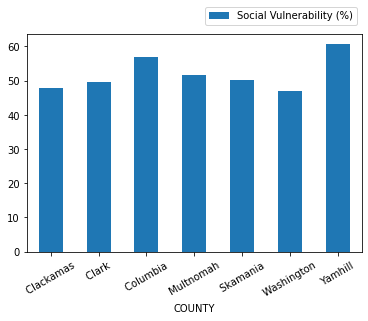

In [16]:
## render a simple bar plot
mean_df.plot.bar(rot = 30).legend(bbox_to_anchor = (1,1.15));

# Working with the census tract data

In [18]:
## read in tracts2010.shp from local save
cwd = os.getcwd()
data_folder = os.path.join(cwd, "Data")
path = os.path.join(data_folder, "tract2010.shp")

cTracts = gpd.read_file(path)

In [19]:
## display data
cTracts.head()

,STATE,COUNTY,TRACT,TRACT_NO,FIPS,POP10,DU10,VAC10,WHITE,BLACK,AIAN,ASIAN,NHPI,OTHER_RACE,POP_2_RACE,HISPANIC,geometry
0,41,071,030102,301.02,41071030102,7594,2850,133,6906,50,45,125,6,266,196,526,"POLYGON ((7567954.608 616785.792, 7568039.163 ..."
1,41,051,001202,12.02,41051001202,3232,1546,54,2894,24,14,161,9,26,104,112,"POLYGON ((7654873.144 677620.008, 7654870.962 ..."
2,41,051,001301,13.01,41051001301,3802,1957,106,3413,40,24,121,2,54,148,187,"POLYGON ((7654977.320 682280.378, 7654977.831 ..."
3,41,051,001302,13.02,41051001302,2946,1289,49,2587,23,9,149,5,31,142,124,"POLYGON ((7654870.962 677498.609, 7654873.144 ..."
4,41,051,001400,14.00,41051001400,4679,2287,126,4102,68,27,218,2,75,187,228,"POLYGON ((7659976.840 681520.073, 7660128.790 ..."


In [20]:
cTracts.tail()

,STATE,COUNTY,TRACT,TRACT_NO,FIPS,POP10,DU10,VAC10,WHITE,BLACK,AIAN,ASIAN,NHPI,OTHER_RACE,POP_2_RACE,HISPANIC,geometry
486,53,011,040509,405.09,53011040509,2990,1312,120,2716,18,39,20,2,56,139,177,"POLYGON ((7723612.996 703799.359, 7723618.180 ..."
487,53,011,040504,405.04,53011040504,4883,1600,110,4622,53,50,27,5,14,112,116,"POLYGON ((7708653.265 798442.658, 7708726.540 ..."
488,53,011,041500,415.00,53011041500,2732,1158,107,2506,24,30,33,3,40,96,142,"POLYGON ((7723612.996 703799.359, 7723610.813 ..."
489,53,011,040202,402.02,53011040202,3658,1361,99,3479,11,25,14,4,26,99,95,"POLYGON ((7662469.303 829451.562, 7662539.709 ..."
490,53,011,040203,402.03,53011040203,5442,1854,76,5128,33,37,47,2,65,130,154,"POLYGON ((7688535.284 810573.209, 7688533.527 ..."


In [21]:
cTracts.columns

Index(['STATE', 'COUNTY', 'TRACT', 'TRACT_NO', 'FIPS', 'POP10', 'DU10',
       'VAC10', 'WHITE', 'BLACK', 'AIAN', 'ASIAN', 'NHPI', 'OTHER_RACE',
       'POP_2_RACE', 'HISPANIC', 'geometry'],
      dtype='object')

In [22]:
cTracts.index

RangeIndex(start=0, stop=491, step=1)

In [23]:
cTracts.dtypes

STATE           object
COUNTY          object
TRACT           object
TRACT_NO       float64
FIPS            object
POP10            int64
DU10             int64
VAC10            int64
WHITE            int64
BLACK            int64
AIAN             int64
ASIAN            int64
NHPI             int64
OTHER_RACE       int64
POP_2_RACE       int64
HISPANIC         int64
geometry      geometry
dtype: object

In [25]:
## subset census tract dataframe to only include FIPS and 
## geometry columns
cTracts = cTracts[['FIPS', 'geometry']]

# Joining the social vulnerability and census tract dataframes

In [26]:
##join tables and display head

cTracts = cTracts.merge(ltd_df, left_on = "FIPS", right_on = "GEOID")
cTracts.head()

,FIPS,geometry,GEOID,NAME,Social Vulnerability (%),TRACT,COUNTY,STATE
0,41071030102,"POLYGON ((7567954.608 616785.792, 7568039.163 ...",41071030102,"Census Tract 301.02, Yamhill County, Oregon",50.982977,Census Tract 301.02,Yamhill,Oregon
1,41051001202,"POLYGON ((7654873.144 677620.008, 7654870.962 ...",41051001202,"Census Tract 12.02, Multnomah County, Oregon",14.903810,Census Tract 12.02,Multnomah,Oregon
2,41051001301,"POLYGON ((7654977.320 682280.378, 7654977.831 ...",41051001301,"Census Tract 13.01, Multnomah County, Oregon",16.204308,Census Tract 13.01,Multnomah,Oregon
3,41051001302,"POLYGON ((7654870.962 677498.609, 7654873.144 ...",41051001302,"Census Tract 13.02, Multnomah County, Oregon",20.981713,Census Tract 13.02,Multnomah,Oregon
4,41051001400,"POLYGON ((7659976.840 681520.073, 7660128.790 ...",41051001400,"Census Tract 14, Multnomah County, Oregon",22.758497,Census Tract 14,Multnomah,Oregon


# Visualizing Social Vulnerability Per County

In [27]:
## create unique list of counties 
coList = cTracts['COUNTY'].unique().tolist()

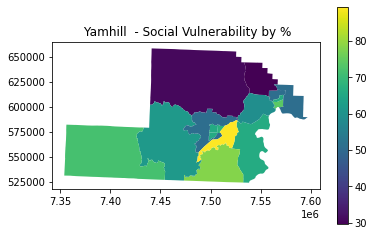

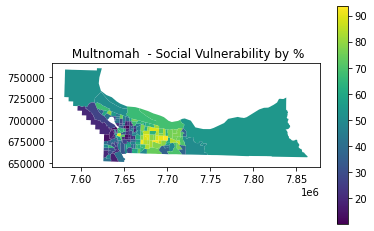

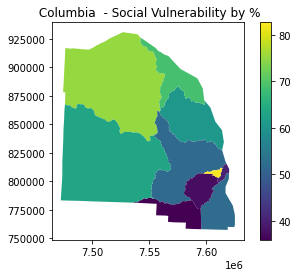

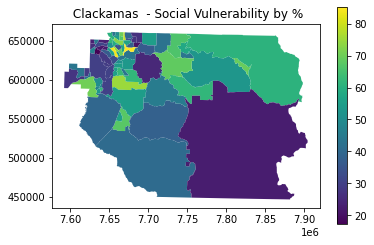

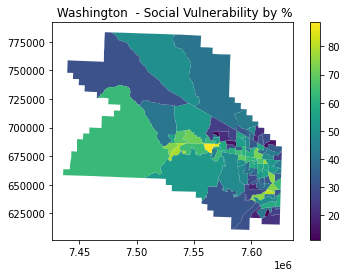

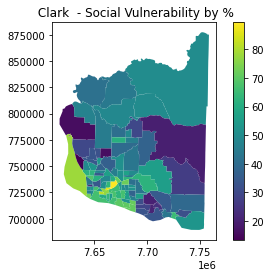

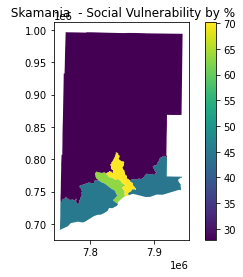

In [29]:
## create loop for displaying maps
for co in coList:   
    county = cTracts[(cTracts.COUNTY == co)]
    county.plot(column = 'Social Vulnerability (%)', legend = True)
    plt.title(f'{co} - Social Vulnerability by %')
    plt.show()
    